# Images as Grids of Pixels

### Import resources

In [3]:
import numpy as np
import matplotlib.image as mpimg  # for reading in images

import matplotlib.pyplot as plt
import cv2  # computer vision library

%matplotlib inline

### Read in and display the image

Original Image dimensions: (427, 640, 3)
Grayscale Image Dimension: (427, 640)


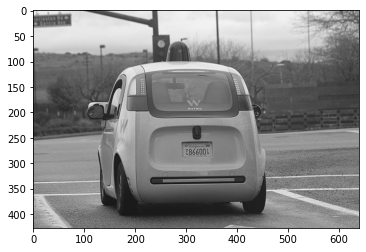

In [13]:
# Read in the image
image = mpimg.imread('images/waymo_car.jpg')

# Print out the image dimensions
print(f'Original Image dimensions: {image.shape}')

# Change from color to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

print(f'Grayscale Image Dimension: {gray_image.shape}')

plt.imshow(gray_image, cmap='gray')

We have to keep in mind, that Matplotlib and OpenCV treat the digital image as NumPy ndarray. Therefore in order to perform a slicing and indexing on the image we have to keep the idea of exes (dimensions) in mind. 

The mathematical x-axis orients itself to the horizontal direction and the y-axis orients itself to the vertical direction. We take note, that in the below indexing example, we have put y value before x value, which is mathematically unintuitive, but makes sense from NumPy's perspective. Because a matrix in NumPy is basically an array of arrays. Looking at the shape (427, 640, 3) of our image, NumPy interprets the same as follows.

In [19]:
smaller_image = image[:4,:4,:]
print(f'Smaller Image Shape: {smaller_image.shape}')
smaller_image

Smaller Image Shape: (4, 4, 3)


array([[[237, 237, 239],
        [235, 235, 237],
        [236, 236, 238],
        [240, 240, 242]],

       [[236, 236, 238],
        [236, 237, 239],
        [237, 237, 239],
        [237, 238, 240]],

       [[235, 236, 238],
        [235, 239, 240],
        [236, 237, 239],
        [232, 236, 237]],

       [[232, 236, 237],
        [235, 241, 241],
        [234, 238, 239],
        [230, 236, 236]]], dtype=uint8)

Smaller image helps us to interpret the digital image shape. We see, that we have an array of 4 items, where each item is in turn an array of dimension (4, 3). That means each item is again an array of 4 items, each of which are a 3 elements unsigned integer array.

Now let's look at single pixel value.

In [20]:
smaller_image[0, 1, :]

array([235, 235, 237], dtype=uint8)

We have taken the 0'th item from the first axis, 1'st item from the second axis, and selected all three color channels. Hence we have three intensity values for three color channels. From the perspective of the original image, we have selected the pixel, which is the 0'th index in the vertical direction, and 1'st index in the horizontal direction.

Let's now see, what's going on with the gray_scale image. We have seen, that it has a single color channel, hence the shape (427, 640). In the following example we are selecting 300'th pixel in the vertical direction (1'st axis in NumPy terms), and 400'th pixel in the horizontal direction (2'nd axis in NumPy terms). And we get a single channel pixel intensity.

In [5]:
# Print specific grayscale pixel values
# What is the pixel value at x = 400 and y = 300 (on the body of the car)?

x = 400
y = 300

print(gray_image[y,x])


159


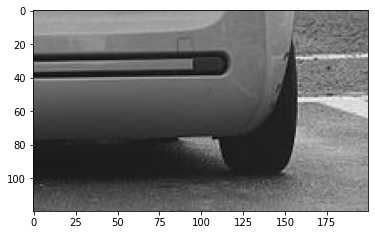

In [22]:
# There are ways to determine, if the selected pixel above belongs to the body of the car.
# Instead of indexing we use slicing in way, that includes the pixel above.
smaller_grayscale_image = gray_image[300:420, 300:500]
plt.imshow(smaller_grayscale_image, cmap='gray')

So indeed, in the earlier cell we selected a pixel from the body of the car.

In the following cell we use the [amax](https://numpy.org/doc/stable/reference/generated/numpy.amax.html), and [amin](https://numpy.org/doc/stable/reference/generated/numpy.amin.html) functions to find the max, and min from a single NumPy array.

In [23]:
#Find the maximum and minimum grayscale values in this image

max_val = np.amax(gray_image)
min_val = np.amin(gray_image)

print('Max: ', max_val)
print('Min: ', min_val)

Max:  255
Min:  2


SO we see from above, that our lowest intensity value is 2, which being closer to 0, represents very dark color. Our max intensity here is 255, which is the maximum number represented by the 8 bit unsigned integer type and it is the pure white.

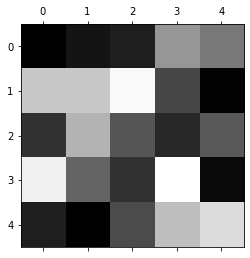

In [40]:
# Create a 5x5 image using just grayscale, numerical values
tiny_image = np.array([[0, 20, 30, 150, 120],
                      [200, 200, 250, 70, 3],
                      [50, 180, 85, 40, 90],
                      [240, 100, 50, 255, 10],
                      [30, 0, 75, 190, 220]])

# To show the pixel grid, use matshow
plt.matshow(tiny_image, cmap='gray')

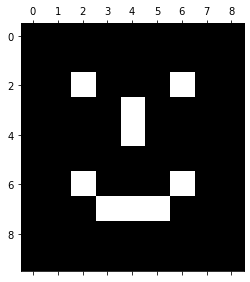

In [47]:
## TODO: See if you can draw a tiny smiley face or something else!
smiley = np.zeros((10, 9))
smiley[2, 2], smiley[2, 6] = 255, 255
smiley[3:5, 4] = 255
# smiley[6, 2] = 255 
# smiley[7, 3] = 255
# smiley[7, 4] = 255
# smiley[7, 5] = 255
# smiley[6, 6] = 255
for y, x in zip([6, 7, 7, 7, 6], range(2,7)):
    smiley[y, x] = 255
plt.matshow(smiley, cmap='gray')